In [169]:
VERSION = 20
CLOUD_SINGLE = True
DATA_SMALL = False

In [170]:
%run ./Code.ipynb

In [171]:
if 'train_md' not in globals() or 'test_md' not in globals():
    train_md, test_md = loadMetadata()

# OOF

In [ ]:
stg = time.time()
for ds in range(6,10):
    for fold in range(3):
        predictions = oof_one(num_iter=32, bs=32, fold=fold, dataset=ds)
        pickle.dump(predictions, open(PATH_DISK/'ensemble/oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'wb'))
        print('total time', time.time() - stg)

completed epochs: 10 iters starting now: 32
adding dummy serieses 8
DataSet 6 valid size 6496 fold 0
dataset valid: 6496 loader valid: 203
loading model model.b10.f0.d6.v20
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.251 time per batch: 0.185
Batch 100 device: cuda time passed: 17.684 time per batch: 0.177
Batch 150 device: cuda time passed: 25.887 time per batch: 0.173
Batch 200 device: cuda time passed: 33.492 time per batch: 0.167
ver 20, iter 0, fold 0, val ll: 0.0652, cor: 0.8369, auc: 0.9875
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.774 time per batch: 0.195
Batch 100 device: cuda time passed: 18.199 time per batch: 0.182
Batch 150 device: cuda time passed: 26.364 time per batch: 0.176
Batch 200 device: cuda time passed: 33.939 time per batch: 0.170
ver 20, iter 1, fold 0, val ll: 0.0653, cor: 0.8367, auc: 0.9874
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.355 time per batch: 0.187
Batch 100 device: cuda time passed: 17.5

Batch 50 device: cuda time passed: 9.196 time per batch: 0.184
Batch 100 device: cuda time passed: 17.184 time per batch: 0.172
Batch 150 device: cuda time passed: 25.240 time per batch: 0.168
Batch 200 device: cuda time passed: 32.760 time per batch: 0.164
ver 20, iter 23, fold 0, val ll: 0.0651, cor: 0.8373, auc: 0.9875
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.508 time per batch: 0.190
Batch 100 device: cuda time passed: 17.648 time per batch: 0.176
Batch 150 device: cuda time passed: 25.758 time per batch: 0.172
Batch 200 device: cuda time passed: 33.134 time per batch: 0.166
ver 20, iter 24, fold 0, val ll: 0.0652, cor: 0.8370, auc: 0.9875
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.499 time per batch: 0.190
Batch 100 device: cuda time passed: 17.678 time per batch: 0.177
Batch 150 device: cuda time passed: 25.733 time per batch: 0.172
Batch 200 device: cuda time passed: 33.205 time per batch: 0.166
ver 20, iter 25, fold 0, val ll: 0.0653, c

Batch 50 device: cuda time passed: 9.573 time per batch: 0.191
Batch 100 device: cuda time passed: 17.772 time per batch: 0.178
Batch 150 device: cuda time passed: 25.785 time per batch: 0.172
Batch 200 device: cuda time passed: 33.333 time per batch: 0.167
ver 20, iter 14, fold 1, val ll: 0.0630, cor: 0.8388, auc: 0.9879
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.414 time per batch: 0.188
Batch 100 device: cuda time passed: 17.624 time per batch: 0.176
Batch 150 device: cuda time passed: 25.622 time per batch: 0.171
Batch 200 device: cuda time passed: 33.411 time per batch: 0.167
ver 20, iter 15, fold 1, val ll: 0.0629, cor: 0.8387, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.614 time per batch: 0.192
Batch 100 device: cuda time passed: 17.852 time per batch: 0.179
Batch 150 device: cuda time passed: 25.977 time per batch: 0.173
Batch 200 device: cuda time passed: 33.525 time per batch: 0.168
ver 20, iter 16, fold 1, val ll: 0.0630, c

ver 20, iter 4, fold 2, val ll: 0.0615, cor: 0.8392, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.556 time per batch: 0.191
Batch 100 device: cuda time passed: 17.616 time per batch: 0.176
Batch 150 device: cuda time passed: 25.900 time per batch: 0.173
Batch 200 device: cuda time passed: 33.558 time per batch: 0.168
ver 20, iter 5, fold 2, val ll: 0.0617, cor: 0.8392, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.495 time per batch: 0.190
Batch 100 device: cuda time passed: 17.533 time per batch: 0.175
Batch 150 device: cuda time passed: 25.709 time per batch: 0.171
Batch 200 device: cuda time passed: 33.233 time per batch: 0.166
ver 20, iter 6, fold 2, val ll: 0.0616, cor: 0.8393, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.564 time per batch: 0.191
Batch 100 device: cuda time passed: 17.797 time per batch: 0.178
Batch 150 device: cuda time passed: 26.088 time per batch: 0.174
Batch 200 device: 

Batch 100 device: cuda time passed: 18.071 time per batch: 0.181
Batch 150 device: cuda time passed: 26.339 time per batch: 0.176
Batch 200 device: cuda time passed: 33.948 time per batch: 0.170
ver 20, iter 28, fold 2, val ll: 0.0616, cor: 0.8395, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.508 time per batch: 0.190
Batch 100 device: cuda time passed: 17.596 time per batch: 0.176
Batch 150 device: cuda time passed: 25.773 time per batch: 0.172
Batch 200 device: cuda time passed: 33.248 time per batch: 0.166
ver 20, iter 29, fold 2, val ll: 0.0615, cor: 0.8395, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.158 time per batch: 0.183
Batch 100 device: cuda time passed: 17.364 time per batch: 0.174
Batch 150 device: cuda time passed: 25.482 time per batch: 0.170
Batch 200 device: cuda time passed: 33.060 time per batch: 0.165
ver 20, iter 30, fold 2, val ll: 0.0615, cor: 0.8396, auc: 0.9889
setFeats, augmentation -1
Batch 50 devi

Batch 50 device: cuda time passed: 9.682 time per batch: 0.194
Batch 100 device: cuda time passed: 17.865 time per batch: 0.179
Batch 150 device: cuda time passed: 26.045 time per batch: 0.174
Batch 200 device: cuda time passed: 33.835 time per batch: 0.169
ver 20, iter 19, fold 0, val ll: 0.0643, cor: 0.8411, auc: 0.9879
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.536 time per batch: 0.191
Batch 100 device: cuda time passed: 17.871 time per batch: 0.179
Batch 150 device: cuda time passed: 26.092 time per batch: 0.174
Batch 200 device: cuda time passed: 33.896 time per batch: 0.169
ver 20, iter 20, fold 0, val ll: 0.0642, cor: 0.8411, auc: 0.9879
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.001 time per batch: 0.220
Batch 100 device: cuda time passed: 21.225 time per batch: 0.212
Batch 150 device: cuda time passed: 31.302 time per batch: 0.209
Batch 200 device: cuda time passed: 39.301 time per batch: 0.197
ver 20, iter 21, fold 0, val ll: 0.0642, 

In [12]:
#total running time 1201.68962931633
#total time 15020.348212480545

4.231111111111111

In [ ]:
# correlation between models
# scores per slice
# what is the best way to agg oof, model\run levels
# best aggregation theoretically
# distribution of oof preds
# score - what uniform p will get
# 0.5 + np.sign(x-0.5) *2*(x-0.5)**2 - makes it less aggressive, is it a good transform above mean?
# does scaling help for single runs, or is it aggregation artifact.

# s101 problem.
    # maybe 8 and 32 behave differently

## Selecting runs aggregation

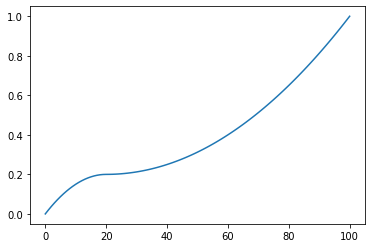

In [38]:
x = np.arange(101)/100
plt.plot(scalePreds(x, center=0.2))

In [4]:
np.set_printoptions(precision=5)

for fold in range(3):
    print('fold', fold)
    data_fold = train_md.loc[train_md.fold == fold]
    ww = data_fold.weights.values
    ww = ww/ww.mean()

    preds = np.stack([pickle.load(open(PATH_WORK/'oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'rb')) \
        for ds in range(6,10)])

    assert len(data_fold) == preds.shape[2]
    
    preds = np.clip(preds, 1e-15, 1-1e-15)
    for afunc in afuncs_names:
        apreds = applyAggFunc(preds, afunc)
        res = ((- data_fold[all_ich].values * np.log(apreds) - (1 - data_fold[all_ich].values) * np.log(1 - apreds))\
            * class_weights).mean((1,2))
        resw = (((- data_fold[all_ich].values * np.log(apreds) - (1 - data_fold[all_ich].values) * np.log(1 - apreds))\
            * class_weights).mean(2)*ww).mean(1)
        
        #roc = [roc_auc_score(data_fold[all_ich].values.reshape(-1), apreds[i].reshape(-1)) for i in range(4)]
        print('{:7s} {} {}'.format(afunc,res,resw))

fold 0
mean    [0.06429 0.06347 0.06388 0.06304] [0.03816 0.03822 0.0384  0.03748]
gmean   [0.06444 0.06361 0.06411 0.06326] [0.03824 0.03834 0.03854 0.03766]
q50     [0.06454 0.06372 0.06428 0.06335] [0.03833 0.03843 0.03866 0.03772]
q25     [0.06518 0.06432 0.06533 0.06426] [0.03866 0.0388  0.03924 0.0383 ]
q75     [0.0646  0.06367 0.06456 0.06314] [0.03832 0.03838 0.03889 0.03755]
psig    [0.06443 0.06362 0.06407 0.06324] [0.03823 0.03836 0.03853 0.03765]
fold 1
mean    [0.06225 0.06248 0.06258 0.06124] [0.03745 0.0385  0.03817 0.03723]
gmean   [0.06232 0.06259 0.06286 0.06144] [0.03755 0.03864 0.0384  0.03744]
q50     [0.06246 0.06274 0.06298 0.06153] [0.03764 0.03872 0.03849 0.03745]
q25     [0.06279 0.06314 0.06421 0.06238] [0.03804 0.03919 0.03941 0.03828]
q75     [0.0627  0.06297 0.06296 0.06155] [0.03752 0.03861 0.03817 0.03711]
psig    [0.06237 0.06263 0.06278 0.06143] [0.03756 0.03865 0.03834 0.03742]
fold 2
mean    [0.06078 0.05956 0.06078 0.05974] [0.03823 0.03747 0.0383  

In [227]:
preds_all = getPredsOOF(aug=8,datasets=range(6,10))

In [6]:
names_y = [
           'model_Densenet201_3_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_{}.pkl',
           'model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_{}.pkl',
           'model_Densenet169_3_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_{}.pkl',
           'model_se_resnext101_32x4d_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_{}.pkl']

In [12]:
preds_y = getYuvalOOF(train_md=train_md, names=names_y)

adding yuval_idx


In [13]:
preds_y.shape

(4, 32, 674252, 6)

In [14]:
preds_y.mean((0,1,2))

array([0.14291, 0.0034 , 0.04872, 0.03418, 0.04798, 0.06318])

In [15]:
#preds_y = preds_y[:,:8]

In [16]:
preds_all = np.concatenate([preds_all, preds_y], axis=0)

In [17]:
preds_all.shape

(8, 8, 674252, 6)

In [18]:
np.set_printoptions(precision=5)

ww = train_md.weights.values
ww = ww/ww.mean()

for afunc in afuncs_names:
    apreds = applyAggFunc(preds_all, afunc)
    res = ((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean((1,2))
    if False:
        resw = (((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
            * class_weights).mean(2)*ww).mean(1)

        print('{:7s} {} {}'.format(afunc,res,resw))
    else:
        print('{:7s} {}'.format(afunc,res))

mean    [0.06244 0.06184 0.06241 0.06134 0.0616  0.06162 0.06231 0.06083]
gmean   [0.06256 0.06196 0.06263 0.06152 0.06166 0.0617  0.06252 0.06099]
q50     [0.06268 0.06209 0.06279 0.06161 0.0617  0.06181 0.06253 0.06106]
q25     [0.06318 0.06258 0.06378 0.06236 0.06211 0.06216 0.06379 0.06168]
q75     [0.06278 0.06217 0.06311 0.06165 0.06171 0.06186 0.06245 0.06118]
psig    [0.06257 0.06199 0.06259 0.06151 0.06166 0.06173 0.06241 0.06099]


In [19]:
((- train_md[all_ich].values * np.log(preds_all) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.06332, 0.06269, 0.06419, 0.06245, 0.06213, 0.06225, 0.06376,
       0.06184])

In [20]:
((- train_md[all_ich].values * np.log(preds_all.mean(1)) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all.mean(1),1e-15,1-1e-15)))
 * class_weights).mean((1,2))

array([0.06244, 0.06184, 0.06241, 0.06134, 0.0616 , 0.06162, 0.06231,
       0.06083])

In [21]:
runs_afunc = 'mean'
preds2 = applyAggFunc(preds_all, runs_afunc)

## Bounding

In [22]:
preds_all.shape

(8, 8, 674252, 6)

In [141]:
preds_all = predBounding(preds_all, target=train_md[all_ich].values)

initial score 0.059136846611720396
any too low inconsistencies
1 class: 0.011970301904925755
2 class: 0.03045474837301187
3 class: 0.025180978328577446
4 class: 0.04475941487752354
5 class: 0.10971465416491163
total 0.15272053327242632
any too low corrected score 0.059130512695806006
any too high inconsistencies
total 0.15224267039623168
any too high corrected score 0.059119088276254124


In [133]:
def predBounding(pp, target=None):
    if target is not None:
        ll = ((- target * np.log(pp.mean((0,1))) - (1 - target) * np.log(np.clip(1 - pp.mean((0,1)),1e-15,1-1e-15)))
            * class_weights).mean()
        print('initial score', ll)
    
    print('any too low inconsistencies')
    for i in range(1,6):
        print(i, 'class:', (pp[...,0] < pp[...,i]).mean())
    print('total', (pp[...,0] < pp[...,1:].max(-1)).mean())
    
    max_vals = pp[...,1:].max(-1)
    mask = pp[...,0] < max_vals
    pp[mask,0] = max_vals[mask]
    #mask_vals = 0.5*(preds_all[:,:,:,0] + max_vals)[mask]
    #preds_all[mask,0] = mask_vals
    #preds_all[mask] = np.clip(preds_all[mask],0,np.expand_dims(mask_vals,1))

    assert (pp[...,0] < pp[...,1:].max(-1)).sum() == 0

    if target is not None:
        ll = ((- target * np.log(pp.mean((0,1))) - (1 - target) * np.log(np.clip(1 - pp.mean((0,1)),1e-15,1-1e-15)))
            * class_weights).mean()
        print('any too low corrected score', ll)
    
    print('any too high inconsistencies')
    mask = pp[...,0] > pp[...,1:].sum(-1)
    print('total', mask.mean())

    mask_val = 0.5*(pp[mask,0] + pp[...,1:].sum(-1)[mask])
    scaler = mask_val / pp[...,1:].sum(-1)[mask]
    pp[mask,1:] = pp[mask,1:] * np.expand_dims(scaler,1)
    pp[mask,0] = mask_val

    if target is not None:
        ll = ((- target * np.log(pp.mean((0,1))) - (1 - target) * np.log(np.clip(1 - pp.mean((0,1)),1e-15,1-1e-15)))
            * class_weights).mean()
        print('any too high corrected score', ll)
    
    return pp

In [230]:
tt = train_md[['SeriesInstanceUID','PatientID']].groupby('PatientID').agg(lambda x: x.nunique())

In [295]:
tt = tt.sort_values('SeriesInstanceUID',ascending=False)

In [301]:
tt.loc[tt.SeriesInstanceUID == 3].head()

,SeriesInstanceUID
PatientID,
ID_fa949caf,3
ID_9d7de224,3
ID_9d7dc280,3
ID_33a89c47,3
ID_afefd364,3


In [237]:
pp = preds_all.mean((0,1))

In [272]:
train_md = pd.concat([train_md, pd.DataFrame(pp,columns=[s+'2' for s in all_ich])],axis=1)

In [274]:
train_md = train_md.sort_values(['SeriesInstanceUID','pos_idx'])

total number of serieses 11


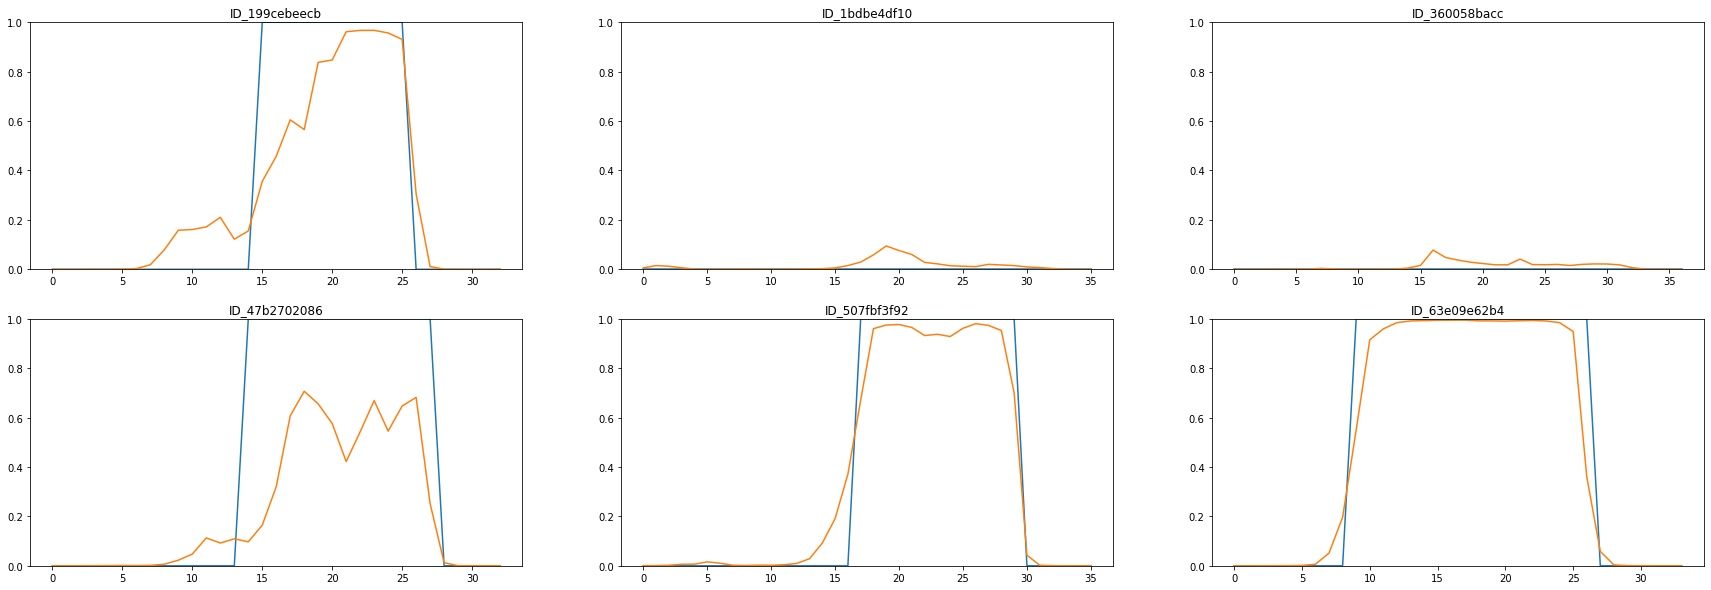

In [294]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10))
serieses = train_md.loc[train_md.PatientID == 'ID_5e035492'].SeriesInstanceUID.unique()
print('total number of serieses', len(serieses))

for i, ax in enumerate(axes.flatten()):
    if i >= len(serieses): continue
    ser = serieses[i]
    a = ax.plot(train_md.loc[train_md.SeriesInstanceUID == ser,'any'].values)
    a = ax.plot(train_md.loc[train_md.SeriesInstanceUID == ser,'any2'].values)
    ax.set_ylim([0,1])
    ax.set_title(ser)

In [303]:
train_md.loc[train_md.SeriesInstanceUID == 'ID_91616854b0']

,fold,img_id,SOPInstanceUID,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,PxlMin,PxlMax,PxlStd,PxlMean,ImageOrientationPatient_0,ImageOrientationPatient_1,ImageOrientationPatient_2,ImageOrientationPatient_3,ImageOrientationPatient_4,ImageOrientationPatient_5,ImagePositionPatient_0,ImagePositionPatient_1,ImagePositionPatient_2,PixelSpacing_0,PixelSpacing_1,WindowCenter_0,WindowCenter_1,WindowCenter_1_NAN,WindowWidth_0,WindowWidth_1,WindowWidth_0_le,WindowWidth_1_le,WindowCenter_1_le,BitType_le,ImageOrientationPatient_4_f,ImageOrientationPatient_4_enc_0,ImageOrientationPatient_4_enc_1,...,ImageOrientationPatient_5_enc_1,ImagePositionPatient_0_f,ImagePositionPatient_0_enc_0,ImagePositionPatient_0_enc_1,ImagePositionPatient_0_f_r1,ImagePositionPatient_0_f_r05,ImagePositionPatient_1_f,ImagePositionPatient_1_enc_0,ImagePositionPatient_2_f,ImagePositionPatient_2_f_r05,PixelSpacing_1_f,PixelSpacing_1_enc_0,PixelSpacing_1_enc_1,WindowCenter_0_le,pos_max,pos_min,pos_size,pos_idx1,pos_idx,pos_idx2,pos_inc1,pos_inc2,pos_inc1_grp_le,pos_inc2_grp_le,pos_inc1_r1,pos_inc1_r0001,pos_inc1_enc_0,pos_inc2_enc_0,pos_inc1_enc_1,pos_inc2_enc_1,pos_size_le,pos_range,pos_rel,pos_zeros,pos_inc_rng,pos_zeros_le,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,PxlMin_grp_le,weights,any2,epidural2,intraparenchymal2,intraventricular2,subarachnoid2,subdural2
183829,2.0,b867760e2,ID_b867760e2,CT,ID_018b83e7,ID_ba1c7199ef,ID_91616854b0,NaN,"['-122.73329', '45.9996796', '63.9000244']","['1', '0', '0', '0', '1', '0']",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00036', '00036']","['00080', '00080']",-1024.0,1.0,1.301333,0.841333,-0.961477,0.754339,1.0,0.0,0.0,0.0,1.0,0.0,-122.73329,45.99968,63.900024,0.488281,0.488281,36.0,36.0,False,80.0,80.0,0,0,0,1,-1.333333,1.0,0.0,...,False,1.340446,0.0,0.0,0.0,0.0,1.479996,1.0,-0.147708,0.0,-0.48,1.0,False,1,0.9156,0.2556,-0.1,-1.152542,0,1.084746,-1.500000,1.500000,0,3,1.0,1.0,1.0,0.0,0.0,0.0,4,-0.000002,-2.000000,0.0,-0.599976,0,0,0,0,0,0,0,2,0.034987,0.000839,0.000099,0.000168,0.000138,0.000511,0.000372
106245,2.0,bc4054157,ID_bc4054157,CT,ID_018b83e7,ID_ba1c7199ef,ID_91616854b0,NaN,"['-122.73329', '45.9996796', '68.9000244']","['1', '0', '0', '0', '1', '0']",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00036', '00036']","['00080', '00080']",-1024.0,1.0,1.302667,0.580000,-0.981734,0.762372,1.0,0.0,0.0,0.0,1.0,0.0,-122.73329,45.99968,68.900024,0.488281,0.488281,36.0,36.0,False,80.0,80.0,0,0,0,1,-1.333333,1.0,0.0,...,False,1.340446,0.0,0.0,0.0,0.0,1.479996,1.0,-0.140544,0.0,-0.48,1.0,False,1,0.9156,0.2556,-0.1,-1.084746,1,1.016949,1.500000,-1.500000,3,3,1.0,1.0,0.0,0.0,0.0,1.0,4,-0.000002,-1.878788,0.0,-0.599976,0,0,0,0,0,0,0,2,0.034987,0.000584,0.000054,0.000185,0.000118,0.000284,0.000325
362507,2.0,5d62cc5c7,ID_5d62cc5c7,CT,ID_018b83e7,ID_ba1c7199ef,ID_91616854b0,NaN,"['-122.73329', '45.9996796', '73.9000244']","['1', '0', '0', '0', '1', '0']",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00036', '00036']","['00080', '00080']",-1024.0,1.0,1.310667,0.632000,-1.000766,0.779547,1.0,0.0,0.0,0.0,1.0,0.0,-122.73329,45.99968,73.900024,0.488281,0.488281,36.0,36.0,False,80.0,80.0,0,0,0,1,-1.333333,1.0,0.0,...,False,1.340446,0.0,0.0,0.0,0.0,1.479996,1.0,-0.133381,0.0,-0.48,1.0,False,1,0.9156,0.2556,-0.1,-1.016949,2,0.949153,-1.500000,-1.500000,3,3,1.0,1.0,0.0,0.0,1.0,1.0,4,-0.000002,-1.757576,0.0,-0.599976,0,0,0,0,0,0,0,2,0.034987,0.001178,0.000100,0.000323,0.000155,0.000567,0.000675
55311,2.0,3ce444e82,ID_3ce444e82,CT,ID_018b83e7,ID_ba1c7199ef,ID_91616854b0,NaN,"['-122.73329', '45.9996796', '78.9000244']","['1', '0', '0', '0', '1', '0']",1,MONOCHROME2,512,512,"['0.48828125', '0.48828125']",16,12,11,0,"['00036',

In [ ]:
cdf49d705

## Selecting models aggregation

In [23]:
for afunc in afuncs_names:
    #print(afunc)
    apreds = applyAggFunc(preds2, afunc, axis=0)
    res = ((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean()
    
    if False:
        best_score = res
        best_k = 0
        for k in range(1,50):
            apreds2 = scalePreds(apreds, 1.0 + 0.01 * k)
            apreds2 = np.clip(apreds2, 1e-15, 1-1e-15)

            res2 = ((- train_md[all_ich].values * np.log(apreds2) - (1 - train_md[all_ich].values) * np.log(1 - apreds2))\
                    * class_weights).mean()

            if res2 > best_score: break
            best_score = res2
            best_k = k

        print('{:7s} {:5f}   {:2f} {:5f}'.format(afunc,res,1+0.01*best_k,best_score))
    else:
        print('{:7s} {:5f}'.format(afunc,res))

mean    0.058905
gmean   0.059180
q50     0.059230
q25     0.060806
q75     0.059752
psig    0.059120


In [24]:
apreds = (preds2*(np.concatenate([np.ones(4)/8,np.ones(4)/8]))[:,None,None]).sum(0)
((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean()

0.0589051240716035

In [25]:
apreds = (preds2*(np.concatenate([np.zeros(4),np.ones(4)/4]))[:,None,None]).sum(0)
((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean()

0.05925450523588664

In [26]:
apreds = (preds2*(np.concatenate([np.ones(4)/16,3*np.ones(4)/16]))[:,None,None]).sum(0)
((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
        * class_weights).mean()

0.058978989694675375

In [27]:
models_afunc = 'mean'

## Scaling

In [47]:
preds_all.shape

(4, 32, 674252, 6)

In [48]:
res = ((- train_md[all_ich].values * np.log(preds_all) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean()

In [49]:
((- train_md[all_ich].values * np.log(preds_all) 
  - (1 - train_md[all_ich].values) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.06268, 0.06259, 0.06242, 0.06195])

In [60]:
if False:
    best_score = res
    best_k = 0
    for k in range(1,50):
        apreds = scalePreds(preds_all, 1.0 + 0.01 * k)
        apreds = np.clip(apreds, 1e-15, 1-1e-15)

        res2 = ((- train_md[all_ich].values * np.log(apreds) - (1 - train_md[all_ich].values) * np.log(1 - apreds))\
                * class_weights).mean()

        if res2 > best_score: break
        best_score = res2
        best_k = k

    print('{{:5f}   {:2f} {:5f}'.format(res,1+0.01*best_k,best_score))

## Models behavior per groups

In [28]:
for col in cols_le:
    for i in train_md[col].unique():
        res = ((- train_md[all_ich].values * np.log(preds_all.mean(1)) - (1 - train_md[all_ich].values) \
                * np.log(1 - preds_all.mean(1))) * class_weights)[:,(train_md[col] == i)].mean((1,2))
        sz = (train_md[col] == i).sum()
        sz_test = (test_md[col] == i).sum()
        print('{:20s} {:2d} {:6d} {:6d} {}'.format(col,i,sz,sz_test,res))

WindowCenter_1_le     0 248151   2157 [0.03754 0.03719 0.03679 0.03699 0.03656 0.03676 0.037   0.03685]
WindowCenter_1_le     2  10377     34 [0.11828 0.11642 0.11726 0.11536 0.11701 0.11623 0.11605 0.11333]
WindowCenter_1_le     3 341674  75369 [0.06474 0.06439 0.06526 0.06359 0.06427 0.06427 0.06513 0.06314]
WindowCenter_1_le     1  70894    985 [0.12907 0.12632 0.12904 0.12675 0.12683 0.12644 0.12791 0.12472]
WindowCenter_1_le     4   3156      0 [0.09075 0.09554 0.09205 0.08595 0.09443 0.09397 0.09533 0.0886 ]
BitType_le            1 323550   3088 [0.05799 0.0573  0.05758 0.05716 0.05684 0.05697 0.05747 0.05667]
BitType_le            0 338723  75369 [0.06411 0.06378 0.0646  0.06293 0.06364 0.06366 0.06451 0.06249]
BitType_le            2   2252     60 [0.12818 0.12513 0.12613 0.12392 0.13314 0.12856 0.12732 0.12169]
BitType_le            4   6776     28 [0.13693 0.12889 0.12844 0.12693 0.1308  0.12802 0.1291  0.12263]
BitType_le            3   2951      0 [0.13769 0.13434 0.14018 0

In [29]:
col = 'PxlMin_grp_le'
for k in range(6):
    for i in train_md[col].unique():
        res = (- train_md[all_ich[k]].values * np.log(preds_all.mean(1)[:,:,k]) - (1 - train_md[all_ich[k]].values) \
                * np.log(1 - preds_all.mean(1)[:,:,k]))[:,(train_md[col] == i)].mean(1)
        sz = (train_md[col] == i).sum()
        sz_test = (test_md[col] == i).sum()
        print('{:20s} {:2d} {:20s} {:6d} {:6d} {}'.format(col,i,all_ich[k],sz,sz_test,res))

PxlMin_grp_le         2 any                  363504   3934 [0.10395 0.10279 0.10281 0.10252 0.10261 0.103   0.10377 0.10255]
PxlMin_grp_le         1 any                   83433   1095 [0.18196 0.17981 0.1821  0.17766 0.18249 0.18235 0.1828  0.17839]
PxlMin_grp_le         0 any                  227315  73516 [0.06435 0.06464 0.06487 0.06336 0.06476 0.06512 0.06577 0.06412]
PxlMin_grp_le         2 epidural             363504   3934 [0.01702 0.01776 0.01722 0.01757 0.01783 0.01777 0.01732 0.01544]
PxlMin_grp_le         1 epidural              83433   1095 [0.02218 0.02326 0.02527 0.0242  0.02376 0.02341 0.0243  0.02053]
PxlMin_grp_le         0 epidural             227315  73516 [0.01231 0.01366 0.01299 0.01279 0.01327 0.01387 0.01382 0.01163]
PxlMin_grp_le         2 intraparenchymal     363504   3934 [0.04702 0.04555 0.04753 0.04491 0.04441 0.04455 0.04546 0.04434]
PxlMin_grp_le         1 intraparenchymal      83433   1095 [0.0879  0.08405 0.08973 0.0842  0.08421 0.08298 0.08739 0.08412]


In [38]:
pd.crosstab([train_md['PxlMin_grp_le']], [train_md[all_ich[0]]])

any,0,1
PxlMin_grp_le,,
0,212492,14823
1,56254,27179
2,308403,55101


## Standard deviation analysis

In [30]:
stds = preds_all.std(1)

In [31]:
stds.mean((1))

array([[0.00663, 0.00082, 0.00371, 0.00237, 0.00463, 0.00465],
       [0.00653, 0.00076, 0.00331, 0.00226, 0.00419, 0.00432],
       [0.01035, 0.00107, 0.00553, 0.00373, 0.00675, 0.00676],
       [0.00783, 0.00065, 0.00383, 0.00267, 0.00484, 0.00487],
       [0.00585, 0.00061, 0.00281, 0.00171, 0.00363, 0.0036 ],
       [0.00608, 0.00067, 0.00278, 0.00178, 0.00325, 0.00362],
       [0.01031, 0.00072, 0.00515, 0.00293, 0.00594, 0.00608],
       [0.0078 , 0.00073, 0.00368, 0.00236, 0.00467, 0.00449]])

In [41]:
stds.shape

(4, 674252, 6)

In [42]:
for i in range(6):
    idx = stds[0,:,i].argmax()
    print(preds_all[0,:,idx,i])

[0.0721  0.69844 0.04717 0.87074 0.90913 0.38538 0.47888 0.49287]
[0.65942 0.14143 0.80356 0.20604 0.03734 0.7852  0.74105 0.29836]
[0.93923 0.87878 0.88173 0.10275 0.9006  0.17714 0.87711 0.22097]
[0.92357 0.05838 0.82988 0.1811  0.91063 0.91305 0.1835  0.28412]
[0.23838 0.77077 0.26534 0.11955 0.63966 0.28781 0.76715 0.17522]
[0.75192 0.22898 0.87654 0.65612 0.38861 0.84263 0.21847 0.60288]


In [43]:
for i in range(6):
    idx = stds[3,:,i].argmax()
    print(preds_all[3,:,idx,i])

[0.89607 0.12613 0.89643 0.10395 0.8919  0.10412 0.12296 0.10019]
[0.29146 0.09448 0.08381 0.29124 0.25786 0.27932 0.26    0.17203]
[0.9805  0.96471 0.96605 0.97915 0.96169 0.12889 0.20027 0.15312]
[0.88048 0.84696 0.0523  0.05313 0.06338 0.23104 0.20848 0.92539]
[0.79051 0.40486 0.24571 0.92017 0.90041 0.22817 0.2481  0.90389]
[0.14481 0.74231 0.74153 0.14874 0.15549 0.66152 0.74362 0.17278]


In [57]:
((- preds_all.mean(1, keepdims=True) * np.log(preds_all) 
  - (1 - preds_all.mean(1, keepdims=True)) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2))

array([[0.14491, 0.00945, 0.03508, 0.02361, 0.05398, 0.06132],
       [0.14669, 0.01034, 0.03552, 0.02403, 0.05463, 0.06025],
       [0.14752, 0.00944, 0.03492, 0.02384, 0.05311, 0.06174],
       [0.14552, 0.01318, 0.03636, 0.02443, 0.05468, 0.06079]])

In [58]:
((- preds_all.mean(1, keepdims=True) * np.log(preds_all) 
  - (1 - preds_all.mean(1, keepdims=True)) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.05472, 0.05524, 0.05509, 0.05582])

In [59]:
((- preds_all.mean((1,2), keepdims=True) * np.log(preds_all) 
  - (1 - preds_all.mean((1,2), keepdims=True)) * np.log(np.clip(1 - preds_all,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([0.6043 , 0.60165, 0.59441, 0.6038 ])

# Inference

In [45]:
stg = time.time()

for ds in range(7,10):
    preds = []
    for fold in range(3):
        preds2 = []
        for anum in range(8):
            predictions = inference_one(fold = fold, anum = anum, bs=bs, dataset=ds)
            preds2.append(predictions)
        preds.append(np.stack(preds2))
    preds = np.stack(preds)
    print('total time', time.time() - stg)
    
    pickle.dump(preds, open(PATH_WORK/'preds_d{}_v{}'.format(ds, VERSION),'wb'))

completed epochs: 10
loading model model.b10.f0.d7.v20
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.526 time per batch: 0.153
B20 -> time passed: 2.362 time per batch: 0.118
B30 -> time passed: 3.266 time per batch: 0.109
B40 -> time passed: 4.109 time per batch: 0.103
B50 -> time passed: 5.558 time per batch: 0.111
B60 -> time passed: 6.227 time per batch: 0.104
B70 -> time passed: 6.670 time per batch: 0.095
test processing time: 11.566713809967041
completed epochs: 10
loading model model.b10.f0.d7.v20
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.587 time per batch: 0.159
B20 -> time passed: 2.497 time per batch: 0.125
B30 -> time passed: 3.266 time per batch: 0.109
B40 -> time passed: 4.156 time per batch: 0.104
B50 -> time passed: 5.589 time per batch: 0.112
B60 -> time passed: 6.353 time per ba

adding dummy serieses 26
DataSet 7 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.560 time per batch: 0.156
B20 -> time passed: 2.432 time per batch: 0.122
B30 -> time passed: 3.284 time per batch: 0.109
B40 -> time passed: 4.143 time per batch: 0.104
B50 -> time passed: 5.454 time per batch: 0.109
B60 -> time passed: 6.186 time per batch: 0.103
B70 -> time passed: 6.679 time per batch: 0.095
test processing time: 11.56418514251709
completed epochs: 10
loading model model.b10.f2.d7.v20
adding dummy serieses 26
DataSet 7 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.561 time per batch: 0.156
B20 -> time passed: 2.391 time per batch: 0.120
B30 -> time passed: 3.176 time per batch: 0.106
B40 -> time passed: 4.024 time per batch: 0.101
B50 -> time passed: 5.401 time per batch: 0.108
B60 -> time passed: 6.270 time per batch: 0.105
B70 -> time passed: 6.820 time per batch: 0.0

adding dummy serieses 26
DataSet 8 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.465 time per batch: 0.147
B20 -> time passed: 2.257 time per batch: 0.113
B30 -> time passed: 3.019 time per batch: 0.101
B40 -> time passed: 3.825 time per batch: 0.096
B50 -> time passed: 5.077 time per batch: 0.102
B60 -> time passed: 5.959 time per batch: 0.099
B70 -> time passed: 6.465 time per batch: 0.092
test processing time: 8.736656188964844
completed epochs: 10
loading model model.b10.f0.d8.v20
adding dummy serieses 26
DataSet 8 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.728 time per batch: 0.173
B20 -> time passed: 2.595 time per batch: 0.130
B30 -> time passed: 3.453 time per batch: 0.115
B40 -> time passed: 4.217 time per batch: 0.105
B50 -> time passed: 5.516 time per batch: 0.110
B60 -> time passed: 6.332 time per batch: 0.106
B70 -> time passed: 6.830 time per batch: 0.0

adding dummy serieses 26
DataSet 8 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.552 time per batch: 0.155
B20 -> time passed: 2.321 time per batch: 0.116
B30 -> time passed: 3.074 time per batch: 0.102
B40 -> time passed: 3.914 time per batch: 0.098
B50 -> time passed: 5.272 time per batch: 0.105
B60 -> time passed: 6.018 time per batch: 0.100
B70 -> time passed: 6.479 time per batch: 0.093
test processing time: 8.563255548477173
completed epochs: 10
loading model model.b10.f2.d8.v20
adding dummy serieses 26
DataSet 8 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.518 time per batch: 0.152
B20 -> time passed: 2.314 time per batch: 0.116
B30 -> time passed: 3.117 time per batch: 0.104
B40 -> time passed: 3.890 time per batch: 0.097
B50 -> time passed: 5.230 time per batch: 0.105
B60 -> time passed: 5.949 time per batch: 0.099
B70 -> time passed: 6.458 time per batch: 0.0

adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.507 time per batch: 0.151
B20 -> time passed: 2.299 time per batch: 0.115
B30 -> time passed: 3.099 time per batch: 0.103
B40 -> time passed: 3.933 time per batch: 0.098
B50 -> time passed: 5.326 time per batch: 0.107
B60 -> time passed: 6.070 time per batch: 0.101
B70 -> time passed: 6.522 time per batch: 0.093
test processing time: 8.935372591018677
completed epochs: 10
loading model model.b10.f1.d9.v20
adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.446 time per batch: 0.145
B20 -> time passed: 2.240 time per batch: 0.112
B30 -> time passed: 2.999 time per batch: 0.100
B40 -> time passed: 3.800 time per batch: 0.095
B50 -> time passed: 5.111 time per batch: 0.102
B60 -> time passed: 5.963 time per batch: 0.099
B70 -> time passed: 6.490 time per batch: 0.0

In [16]:
243*4*4/60

64.8

In [46]:
preds.shape

(3, 8, 78545, 6)

In [47]:
preds.mean((0,1,2))

array([0.13104, 0.00452, 0.04275, 0.03004, 0.0462 , 0.05505],
      dtype=float32)

# Files transfer

In [68]:
!gsutil cp /home/zahar_chikishev/running/oof* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/oof_d6_f0_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f0_v20 [Content-Type=application/octet-stream]...
- [4 files][164.5 MiB/164.5 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying file:///home/zahar_chikishev/running/oof_d7_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d8_f0_

In [69]:
!gsutil cp /home/zahar_chikishev/running/preds* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/preds_d6_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d7_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d8_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d9_v20 [Content-Type=application/octet-stream]...
\ [4 files][172.6 MiB/172.6 MiB]                                                
Operation completed over 4 objects/172.6 MiB.                                    


In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/results/* C:\StudioProjects\Hemorrhage\running\ensemble

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_* .

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_*_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_* .

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_* .

In [ ]:
!gsutil cp gs://rsna-hemorrhage/yuvals/OOF_validation_image_ids.pkl .
!gsutil cp gs://rsna-hemorrhage/yuvals/ensemble_test_image_ids.pkl .

In [19]:
!rm /home/zahar_chikishev/running/*v53

In [18]:
!ls /home/zahar_chikishev/running/*v53

/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v53
/home/zahar_chikishev/running/stats.f0.v53
/home/zahar_chikishev/running/stats.f1.v53
/home/zahar_chikishev/running/stats.f2.v53


In [20]:
!ls /home/zahar_chikishev/running/oof*

/home/zahar_chikishev/running/oof_Densenet161_f0_v72
/home/zahar_chikishev/running/oof_Densenet161_f1_v72
/home/zahar_chikishev/running/oof_Densenet161_f2_v72
/home/zahar_chikishev/running/oof_Densenet169_f0_v73
/home/zahar_chikishev/running/oof_Densenet169_f1_v73
/home/zahar_chikishev/running/oof_Densenet169_f2_v73
/home/zahar_chikishev/running/oof_Densenet201_f0_v74
/home/zahar_chikishev/running/oof_Densenet201_f1_v74
/home/zahar_chikishev/running/oof_Densenet201_f2_v74
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f0_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f1_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f2_v75


In [21]:
!ls /home/zahar_chikishev/running/preds*

/home/zahar_chikishev/running/preds_Densenet161_v72
/home/zahar_chikishev/running/preds_Densenet169_v73
/home/zahar_chikishev/running/preds_Densenet201_v74
/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v75


# Ensembling

In [67]:
preds_all = getPredsOOF(aug=8,datasets=range(6,10))

In [32]:
preds_all.shape

(8, 8, 674252, 6)

In [35]:
stg = time.time()
for fold in range(3):
    for ds_idx in range(len(preds_all)):
        for target in range(6):
            train_ensemble(train_md, preds_all, fold=fold, target=target, ds_idx=ds_idx, first_step=True)
print('total running time', time.time() - stg)

starting model 0 fold 0 target 0
obj  0.09979766095518008
obj  0.09961585668029331
obj  0.09940183354500212
obj  0.0997755135834763
obj  0.09933168323073682
obj  0.09945748935375663
obj  0.09940373951698349
obj  0.09942177295444647
obj  0.09921536057053071
obj  0.099121073907933
obj  0.099088423855841
obj  0.09907867324851787
obj  0.09907624409101681
obj  0.09907505118803715
obj  0.09907475827537518
obj  0.09907470333472539
obj  0.09907470330769187
obj  0.09907470330732189
obj  0.09907468857023731
obj  0.09907468703188567
v20 d0 f0 t0: original ll 0.1012 auc 0.9858, ensemble ll 0.1007 auc 0.9858
running time 3.70558500289917
starting model 0 fold 0 target 1
obj  0.015673323307283715
obj  0.015576802486972807
obj  0.015364412957950959
obj  0.014857900512090887
obj  0.014786759655969383
obj  0.014885529683399462
obj  0.014855272337509145
obj  0.014672268038367752
obj  0.01451015362003513
obj  0.01424971359498118
obj  0.014161990476846645
obj  0.014134198794634326
obj  0.01412690163169718

obj  0.015587410343224278
obj  0.015587406479076537
obj  0.015587405733097484
v20 d2 f0 t1: original ll 0.0189 auc 0.9614, ensemble ll 0.0188 auc 0.9614
running time 3.015907049179077
starting model 2 fold 0 target 2
obj  0.04381530752479414
obj  0.04382092473354208
obj  0.043826213719472776
obj  0.0438761375891912
obj  0.04382003572466065
obj  0.04381854178181301
obj  0.04382020529268252
obj  0.04381873262497733
obj  0.04381574982340534
obj  0.0438112403041496
obj  0.04380585125878961
obj  0.04380581837443902
obj  0.04380581821386982
obj  0.043804991789500446
obj  0.043804986643855154
obj  0.04380495235246444
obj  0.04380495128328548
obj  0.04380494356462415
obj  0.0438049412712365
obj  0.043804941258758764
obj  0.04380494086151709
v20 d2 f0 t2: original ll 0.0464 auc 0.9910, ensemble ll 0.0464 auc 0.9910
running time 3.3284764289855957
starting model 2 fold 0 target 3
obj  0.02623857473598352
obj  0.026252632708053315
obj  0.026290365223252506
obj  0.026150729184865214
obj  0.0262755

obj  0.024604432875191297
obj  0.024597565285167787
obj  0.0245920789071564
obj  0.024587438317448793
obj  0.024587438247669905
obj  0.024586131444089672
obj  0.0245852294401615
obj  0.024585194360911746
obj  0.024585180692331877
obj  0.024585176043469163
v20 d4 f0 t3: original ll 0.0271 auc 0.9959, ensemble ll 0.0269 auc 0.9959
running time 3.398160696029663
starting model 4 fold 0 target 4
obj  0.0650214242606326
obj  0.0650025920159042
obj  0.0650454099336945
obj  0.06490585258716994
obj  0.0650340014643877
obj  0.06497249634657502
obj  0.06497934700501136
obj  0.06497193205887723
obj  0.06488757020702975
obj  0.06484622266706393
obj  0.06484064837486152
obj  0.06483452584807126
obj  0.064834449915461
obj  0.06483426800207533
obj  0.06483423669753305
obj  0.06483423659150357
obj  0.06483422520348797
v20 d4 f0 t4: original ll 0.0674 auc 0.9803, ensemble ll 0.0675 auc 0.9803
running time 3.346433639526367
starting model 4 fold 0 target 5
obj  0.08050401692586097
obj  0.080378241079622

obj  0.025605570801114155
obj  0.025605292399314562
obj  0.02560508439878228
obj  0.025604939286438984
obj  0.025604849715753778
obj  0.025604811439007925
obj  0.025604820176870866
obj  0.02560470407485399
obj  0.025603351564128303
obj  0.025601570641157347
obj  0.02560002171416828
obj  0.025599006214739498
obj  0.0255980663189964
obj  0.025596120500254366
obj  0.02559379321961415
obj  0.025591833466629122
obj  0.025590462743781756
obj  0.02558943924665906
obj  0.025587824529537766
obj  0.025586033669344505
obj  0.02558479183168359
obj  0.025583861470366096
obj  0.025583141379723697
obj  0.02558257778240423
obj  0.025582138146822295
obj  0.02558180121071915
obj  0.025581550145553408
obj  0.025581373968196958
obj  0.025581264812385367
obj  0.025581214781332684
obj  0.02558121762554085
obj  0.025581269547300854
obj  0.02558126220650975
obj  0.0255813434149931
obj  0.0255813434149931
obj  0.02558129835416104
obj  0.02558129835416104
obj  0.025581279168569424
obj  0.025581279168569424
obj 

obj  0.025581354401691167
obj  0.025581354401691167
obj  0.025581353870612902
obj  0.025581353870612902
obj  0.025581302620697476
obj  0.02558130262069747
obj  0.02558128105618227
obj  0.02558128105618227
obj  0.025581271309077752
obj  0.02558127130907775
obj  0.025581266677935446
obj  0.025581266677935446
obj  0.025581264422204736
obj  0.025581264422204736
obj  0.025581263309346083
obj  0.025581263309346083
obj  0.0255812627566743
obj  0.0255812627566743
obj  0.02558126248127852
obj  0.02558126248127852
obj  0.02558126234381575
obj  0.025581262343815758
obj  0.025581262275143155
obj  0.025581262275143155
obj  0.02558126224082155
obj  0.025581262223664438
obj  0.025581262223664438
obj  0.025581262215086786
obj  0.025581262215086786
obj  0.0255812622107982
obj  0.0255812622107982
v20 d6 f0 t3: original ll 0.0280 auc 0.9960, ensemble ll 0.0294 auc 0.9960
running time 14.431846141815186
starting model 6 fold 0 target 4
obj  0.06591888541806278
obj  0.06593418595095638
obj  0.0659650548206

obj  0.06821833756093888
obj  0.06820198521186313
obj  0.06812626740659362
obj  0.06833609979844635
obj  0.06811388527284636
obj  0.06812535115003562
obj  0.06812566414209827
obj  0.06812973209104302
obj  0.06809238048589937
obj  0.06807188707410791
obj  0.06806139728794137
obj  0.0680565199121393
obj  0.0680547562444491
obj  0.06805475048755669
obj  0.06805455078119282
obj  0.06805453543470988
v20 d0 f1 t4: original ll 0.0660 auc 0.9786, ensemble ll 0.0660 auc 0.9786
running time 3.2377209663391113
starting model 0 fold 1 target 5
obj  0.08211417574761934
obj  0.08197287435949328
obj  0.08186687342318155
obj  0.08202624111367793
obj  0.0818053769771145
obj  0.08181383692885172
obj  0.08181258472353789
obj  0.08181217045728839
obj  0.08174294547350487
obj  0.08168610239399467
obj  0.08166541604445833
obj  0.08166148665988336
obj  0.08166065388095665
obj  0.08166049256289763
obj  0.0816604587512935
obj  0.08166045576284989
v20 d0 f1 t5: original ll 0.0835 auc 0.9769, ensemble ll 0.0830 

obj  0.0989303595734214
obj  0.0989303595717259
obj  0.09893035957020199
obj  0.09893035956855785
obj  0.09893035956708145
obj  0.09893035956548636
obj  0.09893035956405534
obj  0.09893035956250729
obj  0.09893035956111958
obj  0.0989303595596164
obj  0.09893035955827027
obj  0.09893035955681011
obj  0.09893035955550372
obj  0.09893035955408477
obj  0.09893035955281644
obj  0.09893035955143702
obj  0.0989303595502052
obj  0.09893035954886363
obj  0.09893035954766682
obj  0.09893035954636166
obj  0.09893035954519835
obj  0.09893035954392812
obj  0.09893035954279711
obj  0.09893035954156044
obj  0.09893035954046037
obj  0.09893035953925594
obj  0.09893035953818557
obj  0.09893035953701215
obj  0.09893035953597044
obj  0.09893035953482682
obj  0.0989303595338126
obj  0.09893035953269773
obj  0.09893035953171
obj  0.09893035953062279
obj  0.09893035952966053
obj  0.09893035952859994
obj  0.09893035952766227
obj  0.09893035952662743
obj  0.09893035952571332
obj  0.09893035952470322
obj  0.0

obj  0.04214499061227583
obj  0.042141637341748736
obj  0.04214066003194807
obj  0.042140538491598614
obj  0.04214052500601829
v20 d3 f1 t2: original ll 0.0425 auc 0.9917, ensemble ll 0.0425 auc 0.9917
running time 3.099250555038452
starting model 3 fold 1 target 3
obj  0.02649221159990656
obj  0.026491370441489234
obj  0.026509088626245205
obj  0.026444408670417054
obj  0.026495500846752732
obj  0.02646456118072573
obj  0.026468503638545523
obj  0.02646545562220254
obj  0.026433944892348207
obj  0.026385889045800876
obj  0.02638535135890489
obj  0.026379606208886176
obj  0.02637752697811413
obj  0.026377319390595684
obj  0.02637728936343165
obj  0.026377285281153514
obj  0.026377284498365003
v20 d3 f1 t3: original ll 0.0248 auc 0.9963, ensemble ll 0.0246 auc 0.9963
running time 3.407355785369873
starting model 3 fold 1 target 4
obj  0.06619204727257419
obj  0.06619428724434043
obj  0.06613466055577577
obj  0.06628627975534336
obj  0.06611175095650526
obj  0.06611093543591214
obj  0.06

obj  0.06584872216816186
obj  0.06609683093900909
obj  0.06585256617957684
obj  0.06587729120726299
obj  0.06587796843808587
obj  0.06588279244898358
obj  0.06584825479854645
obj  0.06580935803878972
obj  0.06580625263468914
obj  0.06580477420555442
obj  0.06580425663084859
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.0658042572684543
obj  0.06580425670165815
obj  0.06580425670165815
obj  0.06580425664745441
obj  0.06580425664745441
obj  0.06580425663499831
obj  0.06580425663499831

obj  0.06646731101377128
obj  0.06646731101377128
obj  0.06646731101377128
obj  0.06646731101377128
obj  0.06646731101377128
obj  0.06646731101377128
obj  0.06646731078729652
obj  0.06646731078729652
obj  0.06646728984218056
obj  0.06646728984218056
obj  0.06646728207757943
obj  0.06646728207757943
obj  0.06646727885679521
obj  0.0664672788567952
obj  0.06646727741137612
obj  0.06646727741137609
obj  0.06646727673019835
obj  0.06646727673019835
obj  0.06646727640339332
obj  0.06646727640339332
obj  0.06646727624261985
obj  0.06646727624261985
obj  0.066467276162886
obj  0.066467276162886
obj  0.06646727612318243
obj  0.06646727612318243
obj  0.06646727610337146
obj  0.06646727610337146
obj  0.06646727609347619
obj  0.06646727609347619
obj  0.06646727608853113
obj  0.06646727608853113
obj  0.06646727608605923
obj  0.06646727608605923
obj  0.06646727608482342
obj  0.06646727608482342
obj  0.06646727608358774
obj  0.06646731101355616
obj  0.06646731101355616
obj  0.06646731101355616
obj  

obj  0.06531038216275899
obj  0.06530881115263736
obj  0.06530844421864739
obj  0.06530805983113838
obj  0.06530797743665742
obj  0.06530797740737394
obj  0.06530764856223176
obj  0.06530760219633373
obj  0.06530760143566496
obj  0.06530758944538166
obj  0.06530758938662776
obj  0.06530758768743071
v20 d7 f1 t4: original ll 0.0649 auc 0.9797, ensemble ll 0.0652 auc 0.9797
running time 5.729487180709839
starting model 7 fold 1 target 5
obj  0.07961508983000164
obj  0.07951805539459707
obj  0.07947332794153467
obj  0.07950556941950052
obj  0.07942218608275861
obj  0.07939812945102297
obj  0.079399890055113
obj  0.07940197487905759
obj  0.07938416280922084
obj  0.07935824419867171
obj  0.07934428446982024
obj  0.07934067525970695
obj  0.07934009747489358
obj  0.0793384849112981
obj  0.07933845218810893
obj  0.07933826919256547
obj  0.0793380854595578
obj  0.07933806752661833
obj  0.07933806142488857
v20 d7 f1 t5: original ll 0.0816 auc 0.9786, ensemble ll 0.0813 auc 0.9786
running time 3.

obj  0.0666858632456599
obj  0.06668586324565987
v20 d1 f2 t4: original ll 0.0658 auc 0.9808, ensemble ll 0.0655 auc 0.9808
running time 3.4301199913024902
starting model 1 fold 2 target 5
obj  0.08421492432082157
obj  0.08409437968655896
obj  0.08395321048725597
obj  0.0842650507766005
obj  0.08389748348057502
obj  0.08394970319956745
obj  0.08394656787538278
obj  0.08394120769421784
obj  0.08378646657474369
obj  0.08367694204907543
obj  0.08363551807339219
obj  0.08362596237932768
obj  0.08362415444493868
obj  0.08362414916389824
obj  0.08362381938868493
obj  0.083623818506782
obj  0.08362375108168599
obj  0.0836237510308755
obj  0.083623739289568
obj  0.0836237392492229
obj  0.08362373924907933
obj  0.08362373661258227
v20 d1 f2 t5: original ll 0.0775 auc 0.9807, ensemble ll 0.0771 auc 0.9807
running time 3.667402982711792
starting model 2 fold 2 target 0
obj  0.10076242063038
obj  0.10071488043554656
obj  0.10061901673498372
obj  0.10094272815196742
obj  0.10060168135789084
obj  0.

obj  0.1005033670796179
obj  0.10050336665088908
obj  0.10050321677848514
obj  0.10050320184156665
obj  0.100503196777737
obj  0.10050319677773686
obj  0.10050319677763271
obj  0.10050319608476133
obj  0.10050319593391226
v20 d4 f2 t0: original ll 0.0976 auc 0.9871, ensemble ll 0.0980 auc 0.9871
running time 3.865821599960327
starting model 4 fold 2 target 1
obj  0.016181309505265425
obj  0.01614751572270899
obj  0.016050244368275467
obj  0.01595502896603175
obj  0.015806581878903065
obj  0.015667485423816758
obj  0.01562963920933326
obj  0.015550458701614527
obj  0.015367627269330292
obj  0.015243166728959425
obj  0.015190334479322854
obj  0.0151596704280265
obj  0.015151071302347507
obj  0.015149026991493397
obj  0.015148610768836659
obj  0.01514858004284213
obj  0.015148571237664556
obj  0.015148569713964737
obj  0.01514856939549915
v20 d4 f2 t1: original ll 0.0187 auc 0.9664, ensemble ll 0.0166 auc 0.9664
running time 3.2771449089050293
starting model 4 fold 2 target 2
obj  0.04361

obj  0.04459575588530069
obj  0.044545326991771286
obj  0.04456040589934971
obj  0.044391775326211164
obj  0.044556834726605335
obj  0.044488071327261895
obj  0.04449819525699443
obj  0.04448924454444057
obj  0.04433661833914444
obj  0.04421874030159188
obj  0.04420075629447065
obj  0.04417179708581635
obj  0.044161040280336725
obj  0.04415993528596655
obj  0.04415898326994475
obj  0.04415888698875215
obj  0.04415886085482889
obj  0.0441588551186548
obj  0.044158853905636765
v20 d6 f2 t2: original ll 0.0404 auc 0.9923, ensemble ll 0.0407 auc 0.9923
running time 3.6633529663085938
starting model 6 fold 2 target 3
obj  0.026781218868337345
obj  0.026776753547724512
obj  0.026766001753250876
obj  0.026816647421449794
obj  0.026776448576890138
obj  0.02679122028947544
obj  0.026761162975933363
obj  0.026765073249933824
obj  0.026297220739328612
obj  0.02620104282405195
obj  0.02616454139486797
obj  0.026150508240221193
obj  0.026144221788542806
obj  0.026140111252341586
obj  0.026138802437

In [36]:
stats = pd.read_csv(PATH_DISK/'ensemble'/'stats.v{}'.format(VERSION))

agg = stats.loc[stats.ds_idx != -1].groupby('target').mean().sort_index()
print('train original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.train_loss * class_weights).mean(), (agg.train_loss_ens * class_weights).mean()))
print('valid original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.valid_loss * class_weights).mean(), (agg.valid_loss_ens * class_weights).mean()))

train original ll 0.06180 ensemble ll 0.06140
valid original ll 0.06180 ensemble ll 0.06162


In [52]:
stats = pd.read_csv(PATH_WORK/'ensemble'/'stats.v{}'.format(VERSION))

agg = stats.loc[stats.ds_idx != -1].groupby('target').mean().sort_index()
print('train original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.train_loss * class_weights).mean(), (agg.train_loss_ens * class_weights).mean()))
print('valid original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.valid_loss * class_weights).mean(), (agg.valid_loss_ens * class_weights).mean()))

train original ll 0.06201 ensemble ll 0.06163
valid original ll 0.06201 ensemble ll 0.06176


In [37]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, ds_idx=-1, first_step=False)
print('total running time', time.time() - stg)

starting fold 0 target 0
obj  0.09515479581546407
obj  0.098528662407879
obj  0.09851988480314487
obj  0.09851147038391998
obj  0.09850545924761514
obj  0.09848836361516161
obj  0.09847702983104299
obj  0.09825646992266145
obj  0.09594504136387894
obj  0.09572266838864263
obj  0.0956440897331082
obj  0.0955947122157146
obj  0.09556727211146625
obj  0.09555431320080916
obj  0.09554352784509164
obj  0.09553379232034843
obj  0.09552914487328269
obj  0.09552651737754322
obj  0.09551373986539637
obj  0.09551595269403601
obj  0.09551595269408449
obj  0.09551595269403601
obj  0.09551595269408449
obj  0.09551595269403601
obj  0.09551595269408449
obj  0.09551595269403601
obj  0.09551595269408449
obj  0.09551595269403601
obj  0.09551595269408449
obj  0.09551595269403601
obj  0.09551595269408449
obj  0.09551561842226035
obj  0.09551561842229797
obj  0.0955174409738477
obj  0.09551744097386415
obj  0.09552017385651533
obj  0.09552017385651533
obj  0.09551547421525496
obj  0.09551547421525494
obj  

obj  0.039085134451969115
obj  0.039085134451969115
obj  0.039085114350817914
obj  0.039085114350817914
obj  0.03908497508801927
obj  0.03908497508801927
obj  0.03908494568847945
obj  0.03908494568847945
obj  0.0390849411678316
obj  0.03908494453827266
obj  0.03908494453827266
obj  0.03908494199507445
obj  0.03908494199507445
obj  0.039084941368075235
obj  0.039084941213935666
obj  0.03908494121393566
obj  0.039084941177639256
obj  0.039084941177639256
obj  0.03908494116942394
obj  0.03908494116942394
obj  0.03908494116779985
obj  0.039084941167799835
obj  0.039084941167608744
obj  0.039084941167608744
obj  0.03908494116766842
obj  0.03908494116766842
obj  0.03908494116773707
obj  0.03908494116778112
obj  0.03908494116780555
obj  0.039084941167818375
obj  0.03908494116781838
obj  0.03908494116782494
obj  0.03908494116782494
obj  0.03908494116782827
obj  0.03908494116782827
obj  0.03908494116782994
obj  0.03908494116782994
obj  0.03908494116783076
obj  0.03908494116783076
obj  0.0390849

obj  0.02340950513073469
obj  0.02340950513073469
obj  0.02340950513073026
obj  0.023409662891650095
obj  0.023409662891650095
obj  0.02340962000472127
obj  0.02340962000472127
obj  0.02340953781028765
obj  0.02340953781028765
obj  0.023409515294571772
obj  0.023409515294571772
obj  0.023409508670545493
obj  0.023409508670545493
obj  0.02340950651511847
obj  0.02340950651511847
obj  0.02340950572654531
obj  0.023409505726545307
obj  0.023409505404543115
obj  0.023409505404543125
obj  0.023409505261613034
obj  0.023409505261613034
obj  0.023409505194665736
obj  0.023409505194665736
obj  0.02340950516232151
obj  0.02340950516232151
obj  0.02340950514643177
obj  0.023409505146431767
obj  0.02340950513855748
obj  0.02340950513855748
obj  0.023409505134637985
obj  0.023409505134637985
obj  0.02340950513268265
obj  0.02340950513268265
obj  0.023409505131706084
obj  0.023409505131706084
obj  0.023409505131218082
obj  0.023409505131218082
obj  0.023409505130974156
obj  0.023409505130974152
obj

obj  0.04113249892909178
obj  0.041134594184953174
obj  0.04107156543813643
obj  0.04108304768589955
obj  0.0409480399041929
obj  0.040136556983342266
obj  0.04006754800372876
obj  0.039980750216931926
obj  0.039958907146053116
obj  0.03994783338954533
obj  0.03993797241666369
obj  0.03992831042695924
obj  0.039923886290115
obj  0.03992350873042487
obj  0.03992327584218542
obj  0.039923264562212145
v20 d-1 f1 t2: original ll 0.0408 auc 0.9927, ensemble ll 0.0406 auc 0.9927
running time 9.589701652526855
starting fold 1 target 3
obj  0.02482850447688076
obj  0.025586173289180187
obj  0.02558376722083048
obj  0.025581894038656076
obj  0.025581451690541334
obj  0.025550308258001708
obj  0.02555368947062216
obj  0.025492060230019743
obj  0.024834016608715037
obj  0.024767151975260575
obj  0.024716894125728625
obj  0.024705448904428984
obj  0.024700393525308572
obj  0.02469714188984356
obj  0.02469698859638774
obj  0.024697025518436624
obj  0.02469702551843432
obj  0.024697025518436624
obj 

obj  0.0783817849800171
obj  0.07838128520210998
obj  0.07838482102754513
obj  0.07837459081775684
obj  0.07832594602942806
obj  0.07816221114334829
obj  0.07774254350404478
obj  0.07769249347840433
obj  0.07767597443399576
obj  0.07767170626910753
obj  0.07766605125859731
obj  0.07763305058416668
obj  0.07760881711484155
obj  0.07760789567943263
obj  0.07760752835360515
obj  0.0776074497526252
obj  0.07760743223081261
obj  0.07760742755028104
obj  0.07760742627028341
obj  0.07760742471449328
obj  0.07760742471247704
obj  0.07760742470637101
v20 d-1 f1 t5: original ll 0.0796 auc 0.9793, ensemble ll 0.0796 auc 0.9792
running time 12.38369870185852
starting fold 2 target 0
obj  0.09674824345769163
obj  0.09971166970268014
obj  0.09969847887882459
obj  0.09968862629255108
obj  0.09968223254404013
obj  0.09964267401520252
obj  0.09963400457500646
obj  0.0994221214711768
obj  0.09741273330783223
obj  0.09730637915690964
obj  0.09723861403896926
obj  0.09719024629905397
obj  0.09715675057251

In [38]:
stats = pd.read_csv(PATH_DISK/'ensemble'/'stats.v{}'.format(VERSION))

agg = stats.loc[stats.ds_idx == -1].groupby('target').mean().sort_index()
print('train original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.train_loss * class_weights).mean(), (agg.train_loss_ens * class_weights).mean()))
print('valid original ll {:.5f} ensemble ll {:.5f}'
      .format((agg.valid_loss * class_weights).mean(), (agg.valid_loss_ens * class_weights).mean()))

train original ll 0.05891 ensemble ll 0.05887
valid original ll 0.05900 ensemble ll 0.05908


In [39]:
yuval_test = pickle.load(open(PATH_DISK/'ensemble/ensemble_test_image_ids.pkl','rb'))
assert len(yuval_test) == len(test_md)

In [147]:
#del test_md['yuval_idx']

In [40]:
df = pd.DataFrame(np.arange(len(yuval_test)), columns=['yuval_idx'])
df.index = yuval_test
test_md = test_md.join(df, on = 'img_id')

In [41]:
names_y = [
           'model_Densenet201_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_{}.pkl',
           'model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_{}.pkl',
           'model_Densenet169_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_{}.pkl',
           'model_se_resnext101_32x4d_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_{}.pkl',
           ]

In [43]:
preds_y = np.stack([torch.sigmoid(torch.stack([torch.stack(pickle.load(
    open(PATH_DISK/'ensemble'/name.format(fold),'rb'))) for fold in range(3)])).numpy() for name in names_y])

In [44]:
preds_y = preds_y[:,:,:,test_md.yuval_idx]
preds_y = preds_y[:,:,:8]
preds_y = preds_y[:,:,:,:,np.array([5,0,1,2,3,4])]

In [45]:
preds = np.stack([pickle.load(open(PATH_WORK/'preds_d{}_v{}'.format(ds, VERSION),'rb')) for ds in range(6,10)])
preds = np.concatenate([preds, preds_y], axis=0)

In [161]:
preds = predBounding(preds)

any too low inconsistencies
1 class: 0.007253697455810894
2 class: 0.02571307318522291
3 class: 0.018276890105459714
4 class: 0.03784295626710803
5 class: 0.10086617013601545
total 0.14514153245485603
any too high inconsistencies
total 0.14853099072718398


In [46]:
stg = time.time()

test_preds_trgt = []
for target in range(6):
    
    test_preds_folds = []
    for fold in range(3):
        
        test_preds = []
        for ds_idx in range(len(preds)):
            model = pickle.load(open(PATH_DISK/'ensemble'/'model.d{}.f{}.t{}.v{}'
                                     .format(ds_idx,fold,target,VERSION),'rb'))
            X,y,ll_train,auc_train =  getFirstStepX(None, preds[:,fold], TH=model.prior, 
                                                    powerLow=model.powerLow, powerHigh=model.powerHigh, 
                                                    fold=fold, target=target, ds_idx=ds_idx, mode='test')
            test_preds.append((X*np.expand_dims(model.x, axis=1)).sum(0))
        
        X = np.stack(test_preds)
        model = pickle.load(open(PATH_DISK/'ensemble'/'model.d{}.f{}.t{}.v{}'
                                 .format(-1,fold,target,VERSION),'rb'))
        test_preds_folds.append((X*np.expand_dims(model.x, axis=1)).sum(0))
    
    X = np.stack(test_preds_folds).mean(0)
    test_preds_trgt.append(X)

predictions = np.stack(test_preds_trgt,axis=1)

print('total running time', time.time() - stg)

total running time 5.297455072402954


In [48]:
np.corrcoef(preds.mean((1,2))[:,:,0])

array([[1.     , 0.99483, 0.99506, 0.99214, 0.99665, 0.99363, 0.99412,
        0.9909 ],
       [0.99483, 1.     , 0.99486, 0.99261, 0.99354, 0.99699, 0.99401,
        0.99139],
       [0.99506, 0.99486, 1.     , 0.99236, 0.99328, 0.99345, 0.99609,
        0.99095],
       [0.99214, 0.99261, 0.99236, 1.     , 0.99119, 0.99193, 0.99145,
        0.99783],
       [0.99665, 0.99354, 0.99328, 0.99119, 1.     , 0.99532, 0.9962 ,
        0.99192],
       [0.99363, 0.99699, 0.99345, 0.99193, 0.99532, 1.     , 0.99542,
        0.99251],
       [0.99412, 0.99401, 0.99609, 0.99145, 0.9962 , 0.99542, 1.     ,
        0.99182],
       [0.9909 , 0.99139, 0.99095, 0.99783, 0.99192, 0.99251, 0.99182,
        1.     ]])

In [49]:
predictions.shape

(78545, 6)

# Submitting

In [5]:
preds = pickle.load(open(PATH_WORK/'preds_d{}_v{}'.format(9, 20),'rb'))

In [51]:
preds = 0.5* (pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet169', 51),'rb')) +
         pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet201', 52),'rb')))

In [53]:
preds = (pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet169', 51),'rb')) +
         pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet201', 52),'rb')) +
         pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('se_resnext101_32x4d', 53),'rb'))) / 3

In [114]:
preds = np.stack([pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet161', 72),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet169', 73),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('Densenet201', 74),'rb')),
                  pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('se_resnext101_32x4d', 78),'rb'))])

In [118]:
np.set_printoptions(precision=5)

In [147]:
preds.std(2).mean((1,2))

array([[0.00797, 0.00125, 0.0039 , 0.0026 , 0.00511, 0.00504],
       [0.00727, 0.00117, 0.00363, 0.00238, 0.00469, 0.00434],
       [0.00687, 0.00118, 0.00313, 0.00217, 0.00415, 0.00443],
       [0.00905, 0.00102, 0.00443, 0.00315, 0.00575, 0.00509]],
      dtype=float32)

In [63]:
((- preds.mean((1,2), keepdims=True) * np.log(np.clip(preds,1e-15,1-1e-15)) 
  - (1 - preds.mean((1,2), keepdims=True)) * np.log(np.clip(1 - preds,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3))

array([[0.15249, 0.01507, 0.03719, 0.02508, 0.05596, 0.06206],
       [0.14765, 0.01445, 0.03652, 0.02455, 0.05567, 0.05837],
       [0.14786, 0.01586, 0.0346 , 0.02439, 0.05371, 0.06038],
       [0.1466 , 0.01732, 0.03613, 0.02529, 0.05583, 0.05959]])

In [65]:
((- preds.mean((1,2,3), keepdims=True) * np.log(np.clip(preds,1e-15,1-1e-15)) 
  - (1 - preds.mean((1,2,3), keepdims=True)) * np.log(np.clip(1 - preds,1e-15,1-1e-15)))
 * class_weights).mean((1,2,3,4))

array([0.54027, 0.54585, 0.53983, 0.54938])

In [189]:
preds = pickle.load(open(PATH_WORK/'preds_{}_v{}'.format('se_resnext101_32x4d', 75),'rb'))

In [6]:
preds.shape

(3, 8, 78545, 6)

In [194]:
predictions = np.quantile(preds,q=0.5,axis=(1)).mean(0)

In [120]:
predictions = preds.mean((0,1,2))

In [73]:
predictions = scalePreds(predictions, 1.13)

In [50]:
test_md['pred_any'] = predictions[:,0]

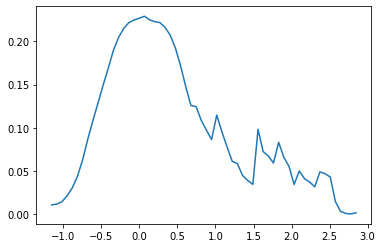

In [51]:
plt.plot(test_md[['pos_idx1','pred_any']].groupby('pos_idx1').mean())

In [89]:
predictions = np.exp(np.log(preds).mean((0,1)))

In [43]:
predictions = 1 / (1 + np.exp(-(np.log(preds/(1-preds)).mean((0,1)))))

In [7]:
predictions = preds.mean((0,1))

In [52]:
predictions.mean(0)

array([0.13278, 0.00531, 0.04268, 0.03012, 0.04659, 0.05525])

In [57]:
predictions.mean(0)

array([0.1280228 , 0.00678272, 0.04317398, 0.03195811, 0.04593468,
       0.05528003], dtype=float32)

In [ ]:
#0.137883,0.004889,0.045248,0.031052,0.045235,0.0594456,

In [53]:
id_column = np.array([a + '_' + b for a in test_md.SOPInstanceUID for b in all_ich])
sub = pd.DataFrame({'ID': id_column, 'Label': predictions.reshape(-1)})

In [186]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13768220395352693

In [58]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.1281835436820984

In [55]:
best_sub = pd.read_csv(PATH/'submission_061.csv')

In [56]:
best_sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13475628267250275

In [223]:
sub.to_csv(PATH/'sub.csv', index=False)

In [226]:
sp.stats.spearmanr(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
                   best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])

SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)

In [224]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.994082372284767

In [63]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9944464662920349

In [59]:
!~/.local/bin/kaggle competitions submit rsna-intracranial-hemorrhage-detection -f ~/sub.csv -m "GCP, 8 models, 8TTA, 3folds, ensemble"

100%|██████████████████████████████████████| 20.8M/20.8M [00:05<00:00, 4.22MB/s]
Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [ ]:
!kaggle competitions submit rsna-intracranial-hemorrhage-detection -f C:/StudioProjects/Hemorrhage/sub.csv -m "GCP, d161+d169+d201+s101+yd161, 8TTA, ensemble, bounds"